# Healthcare Stroke Prediction

## Exploratory Data Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy.stats as st

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [42]:
URL = 'https://drive.google.com/file/d/1mVXZs_EMuWSK2kVqqsGQLbWB1RkRfPk6/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Descriptive Statistic

#### Data Type

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Check Duplicated Data

In [44]:
df.duplicated().any()

False

In [45]:
df.duplicated(subset=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']).sum()

0

#### Check Null Data

In [46]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
print('Data Null BMI: ' + str(df['bmi'].isna().sum() / df.shape[0] * 100) + '%')

Data Null BMI: 3.9334637964774952%


Because null value are below 5% we will handle null value with deleting null value

In [48]:
df.dropna(subset=['bmi'], inplace=True)

In [49]:
df.shape

(4909, 12)

#### Describe data

In [50]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Observation:

A.  All data type is correct and no duplicate data

B. Almost all columns have no null/missing values except for BMI

### Univariate Analysis

In [51]:
# Categorized by type of data
numericals = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categoricals = ['gender','ever_married','work_type','Residence_type', 'smoking_status']

In [52]:
# Numerical columns
df[numericals].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


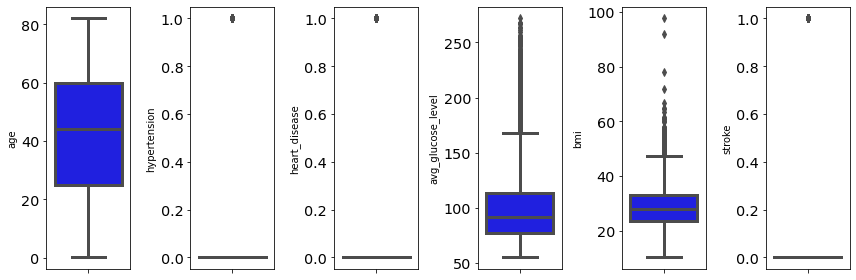

In [53]:
# Individual Boxplot (Numerical)
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,4)

Boxplot:

* Age looks like normal distribution
* `Avg_glucose_level` and `bmi` are not normal distribution, there's outlier in the data.
*  Besides 3 column above, all column have bias.

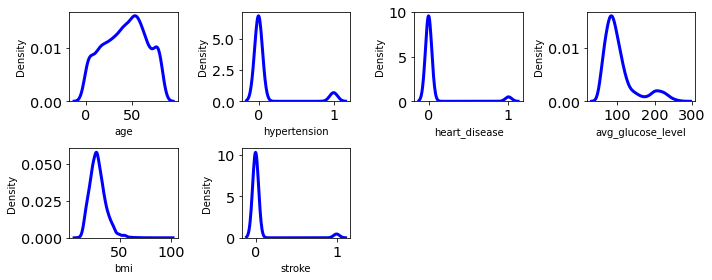

In [54]:
# Individual Distplot (Numerical)
features = numericals
for i in range (0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (12,5)

Distribution Plot
- All column don't have a normal distribution
- All column looks like skewed except age
- There's a possibility to do some thing with skewed column

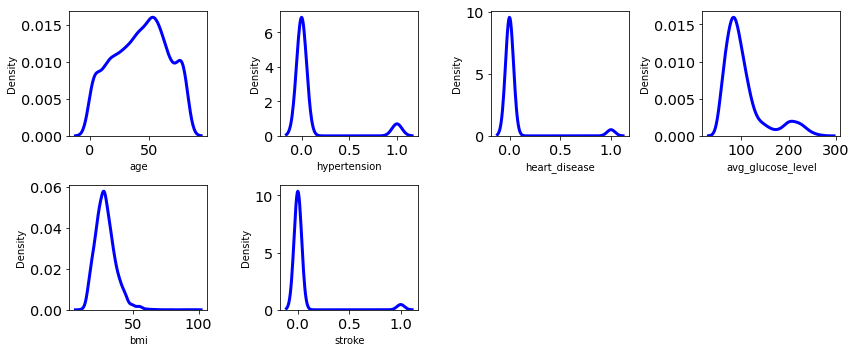

In [55]:
# Individual Distplot (Numerical)
features = numericals
for i in range (0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (12,5)

In [56]:
df['stroke'].sum()

209

In [57]:
# kolom kategori
df[categoricals].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


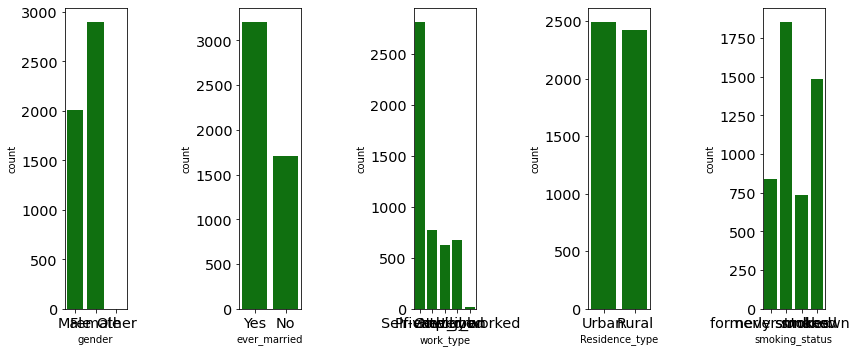

In [58]:
# Individual Countplot (Categorical)
features = categoricals
for i in range(0, len(features)):
    ax = plt.subplot(1, 
                len(features),
                i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (18,6)

Observation:
1. in the gender data, it appears that there are more women than men and others
2. In the residence_type data, urban and rural have a typically same data

### Multivariate Analysis

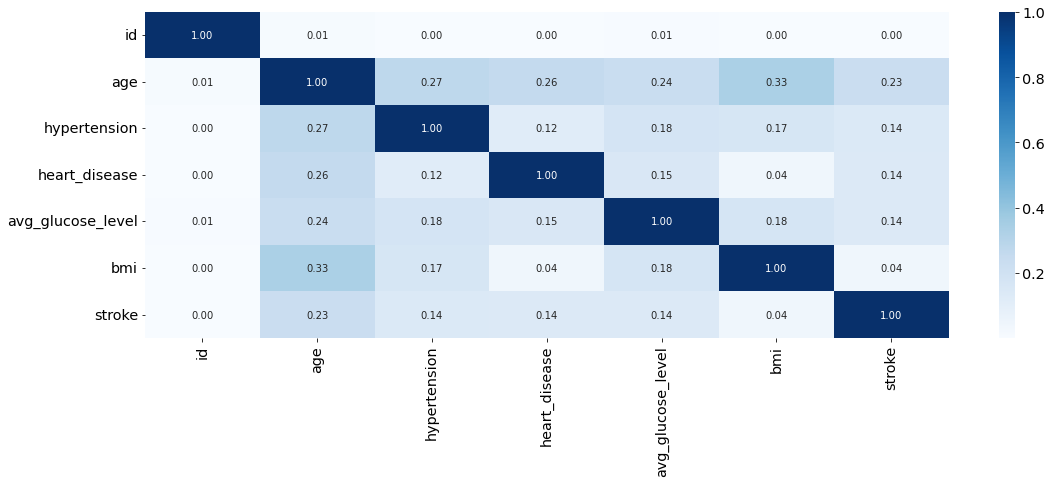

In [59]:
# Correlation Matrix
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

From the *correlation heatmap* we can see that:
* `BMI` and `Age` have a positive correlation
* There are some a weak positive correlation

## Data Preparation

### Data Cleansing

#### Handling Outliers

In [60]:
# print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

# filtered_entries = np.array([True] * len(df))

# col2 = ['age', 'avg_glucose_level', 'bmi']
# for col2 in numericals:
#     zscore = abs(st.zscore(df[col])) # hitung absolute z-scorenya
#     filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
# df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

# print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

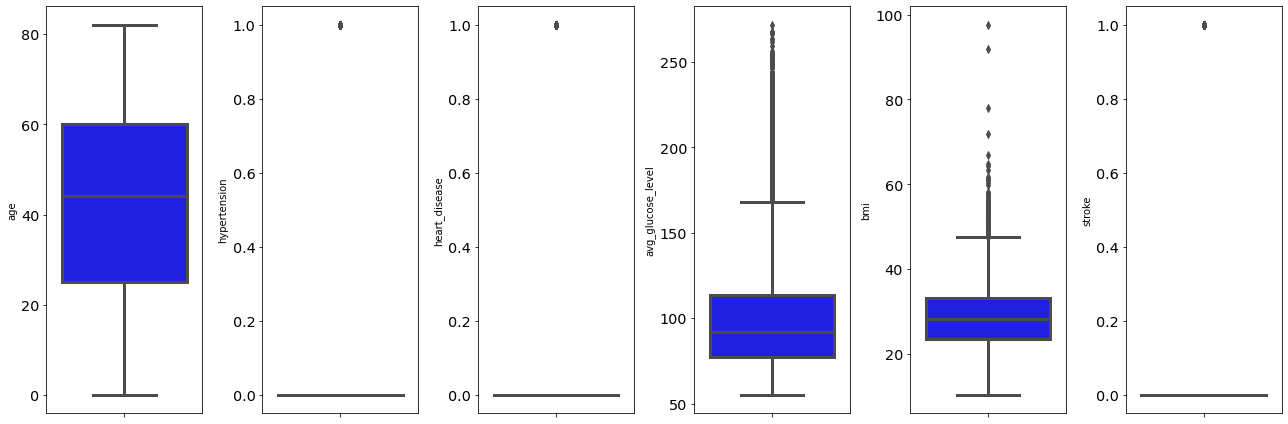

In [61]:
# Individual Boxplot (Numerical)
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (12,4)

#### Normalization

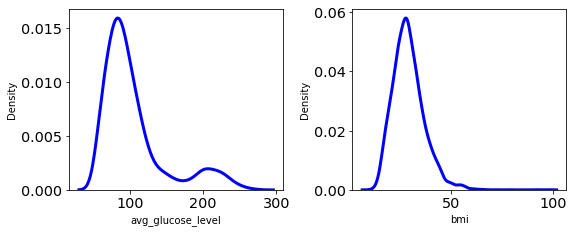

In [62]:
features = ['avg_glucose_level', 'bmi']
plt.figure(figsize=(12, 6))
for i in range (0, len(features)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

`bmi` column is already normalized while `avg_glucose_level` is not.

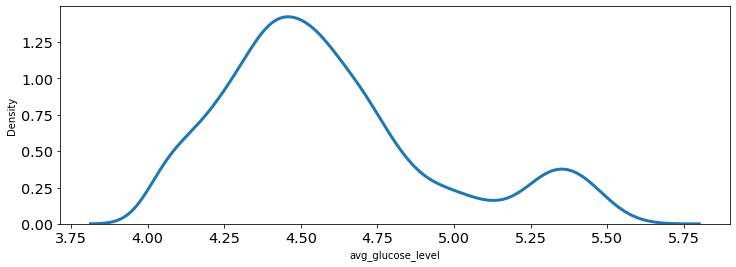

In [63]:
sns.kdeplot(np.log(df['avg_glucose_level']));

Using Log Transformation to normalize the data don't affect the data so much.

### Data Transformatioan

#### Feature Encoding


Transform the categorical values of the relevant features into numerical ones.

In [64]:
categoricals = ['gender','ever_married','work_type','Residence_type', 'smoking_status']

for col in categoricals:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')


value counts of column gender
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
------------------------------ 

value counts of column ever_married
Yes    3204
No     1705
Name: ever_married, dtype: int64
------------------------------ 

value counts of column work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
------------------------------ 

value counts of column Residence_type
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
------------------------------ 

value counts of column smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64
------------------------------ 



Using label encoding on smoking_status column because it has ranking, other column use One Hot Encoding

In [65]:
#Untuk mengurangi bias maka gender other dimasukan dalam male
mapping_gender = {
    'Male' : 'Male',
    'Female' : 'Female',
    'Other' : 'Male'
}

mapping_smoking_status = {
    'never smoked' : 0,
    'Unknown' : 1,
    'formerly smoked' : 2,
    'smokes' : 3
}

In [66]:
#Label Encoding
df['gender'] = df['gender'].map(mapping_gender)
df['smoking_status'] = df['smoking_status'].map(mapping_smoking_status)

In [67]:
for cat in ['gender','ever_married','work_type','Residence_type']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [68]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,0,1,0,0,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,0,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,0,1,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,0,1,0,0,0,1,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,...,1,0,1,0,0,1,0,0,0,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4909 non-null   int64  
 1   gender                   4909 non-null   object 
 2   age                      4909 non-null   float64
 3   hypertension             4909 non-null   int64  
 4   heart_disease            4909 non-null   int64  
 5   ever_married             4909 non-null   object 
 6   work_type                4909 non-null   object 
 7   Residence_type           4909 non-null   object 
 8   avg_glucose_level        4909 non-null   float64
 9   bmi                      4909 non-null   float64
 10  smoking_status           4909 non-null   int64  
 11  stroke                   4909 non-null   int64  
 12  gender_Female            4909 non-null   uint8  
 13  gender_Male              4909 non-null   uint8  
 14  ever_married_No         

In [70]:
df_2 = df.drop(columns=['id', 'gender', 'ever_married', 'work_type', 'Residence_type' ])

In [71]:
df_2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,2,1,0,1,0,1,0,0,1,0,0,0,1
2,80.0,0,1,105.92,32.5,0,1,0,1,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,3,1,1,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,0,1,1,0,0,1,0,0,0,1,0,1,0
5,81.0,0,0,186.21,29.0,2,1,0,1,0,1,0,0,1,0,0,0,1


In [72]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4909 non-null   float64
 1   hypertension             4909 non-null   int64  
 2   heart_disease            4909 non-null   int64  
 3   avg_glucose_level        4909 non-null   float64
 4   bmi                      4909 non-null   float64
 5   smoking_status           4909 non-null   int64  
 6   stroke                   4909 non-null   int64  
 7   gender_Female            4909 non-null   uint8  
 8   gender_Male              4909 non-null   uint8  
 9   ever_married_No          4909 non-null   uint8  
 10  ever_married_Yes         4909 non-null   uint8  
 11  work_type_Govt_job       4909 non-null   uint8  
 12  work_type_Never_worked   4909 non-null   uint8  
 13  work_type_Private        4909 non-null   uint8  
 14  work_type_Self-employed 

In [73]:
df_2.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')

## Machine Learning Preparation

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings(action='ignore')

### Train Test

#### Split Feature and Target

In [75]:
x = df_2[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban']]
y = df_2['stroke']

#### Split Train Test Data

In [76]:
#Splitting the data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#### Model Training

In [77]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.


In [78]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

                   Logistic Regression: 94.87%
                   K-Nearest Neighbors: 94.22%
                         Decision Tree: 91.29%
Support Vector Machine (Linear Kernel): 94.87%
   Support Vector Machine (RBF Kernel): 94.87%
                        Neural Network: 94.54%
                         Random Forest: 95.03%
                     Gradient Boosting: 94.63%
                               XGBoost: 94.54%
                              LightGBM: 94.54%
